Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kanawut Kaewnoparat"
ID = "st122109"

---

# Lab 02: Nonlinear Regression and Overfitting

In Lab 01, we explored the construction of linear regression models. Recall the assumptions we make in linear regression:
- $\textbf{x} \in {\cal X} = \mathbb{R}^n$
- $y \in {\cal Y} = \mathbb{R}$
- The $\textbf{x}$ data are drawn i.i.d. from some (unknown) distribution over ${\cal X}$
- There is a linear relationship between $\textbf{x}$ and $y$ with additive constant-variance Gaussian noise, i.e., $y \sim {\cal N}(\theta^\top \textbf{x}, \sigma^2)$,
  where $\theta \in \mathbb{R}^{n+1}$ is unknown and $\textbf{x}$ is an $n+1$-dimensional vector augemented with a constant value of 1 as its first element.

Today, we consider what we might do when the fourth assumption, linearity, does not hold. We introduce a particular form of nonlinear regression,
*polynomial regression*, in which we account for nonlinear relationships between $\mathbf{x}$ and $y$ by performing nonlinear transformations of
the input variables in $\mathbf{x}$.

As an example, if we had a single input variable $x$, linear regression gives us the hypothesis
$$h_\theta(x) = \theta_0 + \theta_1 x .$$
We can add a new "variable" $x^2$, which is a nonlinear transformation of the input $x$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 .$$
The important thing to notice here is that although the hypothesis is *nonlinear* in $x$, allowing us to model a more complex function than
ordinary linear regression, the hypothesis is *linear* in $\theta$, allowing us to use the normal equations to find the optimal $\theta$ as before.

## Polynomial Regression

More generally, polynomial regession is a form of linear regression in which the relationship between the independent variables $\mathbf{x}$ and the dependent
variable $y$ is modelled as a polynomial.

For a single input $x$, the hypothesis in a polynomial regression of degree $d$ is
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_d x^d$$
$$h_\theta(x) = \sum_{i=0}^{d} \theta_i x^i$$

For a multivariate input $\mathbf{x}$, we introduce terms corresponding to every degree-$d$
combination of factors. For example, if $n=3$ and $d=2$, we have
$$h_\theta(\mathbf{x}) = \theta_0
                       + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3
                       + \theta_4 x_1^2 + \theta_5 x_1 x_2 + \theta_6 x_1 x_3
                       + \theta_7 x_2^2 + \theta_8 x_2 x_3 + \theta_9 x_3^2 .$$

## Example 1: Synthetic data with a quadratic nonlinearity

Let's take a look at how polynomial regression as compared to simple linear regression model works for data with a
simple quadratic nonlinearity.

### Generate a synthetic dataset

First, we generate 100 observations from a ground truth quadratic function with Gaussian noise:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

# please do not change the random seed, or the autograder's result checking will be wrong!

np.random.seed(0)
random.seed(0)

In [3]:
# Generate X
m = 100
X = np.random.uniform(-4, 4, (m,1))

# Generate y
a = 0.7
b = 1
c = 2
y = a * X**2 + b * X + c + np.random.randn(m, 1)

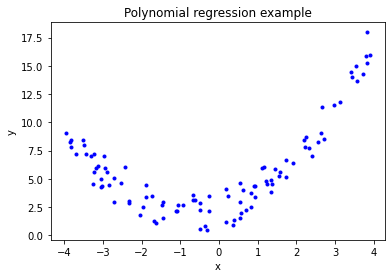

In [4]:
# Plot
plt.plot(X, y, 'b.')
plt.title('Polynomial regression example')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Implement the hypothesis function

First, we will use ordinary linear regression:
$$h_\theta(x) = \theta_0 + \theta_1 x$$
Then, we use polynomial regression with $d=2$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 $$ 
In either case, by letting the input vector $\bf{x} = \begin{bmatrix} 1 \\ x \end{bmatrix}$
or $\bf{x} = \begin{bmatrix} 1 \\ x \\ x^2 \end{bmatrix}$
appropriately, the hypothesis can be written
$$ h_\mathbf{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x} . $$

Let's implement this hypothesis function in Python:

In [5]:
def h(X, theta):
    return X.dot(theta)

### Implement the regression function (normal equations)

Recall the normal equations used to find the $\theta$ minimizing $J(\theta)$
when the design matrix $\mathtt{X}_{m\times(n+1)}$ contains one row for each example and
$\mathbf{y}$ is a column vector:
$$\mathbf{\theta} = (\mathtt{X}^\top \mathtt{X})^{-1}\mathtt{X}^\top\mathbf{y}$$

Let's implement the normal equations in Python:

In [6]:
def regression(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta

### Exercise 1.1 (2 points)

Create a Python function to calculate the RMSE (root mean squared error) for a set of predictions
$\hat{\mathbf{y}}$:
$$\mathrm{RMSE}(\mathbf{y},\hat{\mathbf{y}}) = \sqrt{\frac{\sum_{i=1}^{m} \left( y^{(i)}-\hat{y}^{(i)} \right)^2}
{m}}$$

In [7]:
theta = regression(X,y)

In [8]:
yhat = h(X, theta)

In [9]:
def rmse(y, y_pred):
    error = np.sqrt(np.sum((y - y_pred)**2) / len(y))
    return error
#     raise NotImplementedError()
    return error

In [10]:
print(rmse(y, yhat))

6.798430117697281


In [11]:
print(rmse(np.array([1,1.1,2,-1]), np.array([1.1,1.3,1.5,0.1])))

# Test function: Do not remove
assert np.round(rmse(np.array([1,1.1,2,-0.1]), np.array([1.1,1.3,1.5,0.1])), 5) == np.round(0.29154759474226505, 5), "calculate rmse incorrect"
print("success!")
# End Test function

0.6144102863722254
success!


**Expected output:** 0.6144102863722254

### Implement a simple linear model

OK, as stated earlier, let's implement a simple linear model:

In [12]:
# Add intercept column of all 1's
X_aug = np.insert(X, 0, 1, axis=1)

# Print first 5 rows of X
print(X_aug[0:5,:])

# Find optimal parameters
theta_slr = regression(X_aug, y)
print(f'theta slr: {theta_slr}')

# Predict y
y_pred_slr= h(X_aug, theta_slr)

print('Linear regression RMSE: %f' % rmse(y, y_pred_slr))

[[ 1.          0.39050803]
 [ 1.          1.72151493]
 [ 1.          0.82210701]
 [ 1.          0.35906546]
 [ 1.         -0.61076161]]
theta slr: [[5.90528611]
 [0.79836272]]
Linear regression RMSE: 3.413803


In [13]:
print(X_aug.shape)
print(theta_slr.shape)

assert np.dot(X_aug , theta_slr).shape == y.shape, 'the shape of output product must be the same as y shape'

(100, 2)
(2, 1)


In [14]:
import seaborn as sns

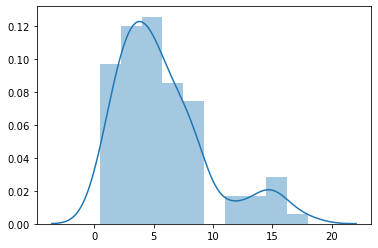

In [15]:
sns.distplot(y)

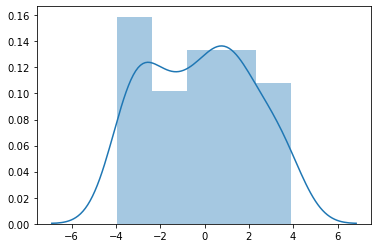

In [16]:
sns.distplot(X)

### Exercise 1.2 (2 points)

From the simple linear model above, create another linear model using a **polynomial** model with degree $d=2$.
You need to implement these steps:
 - Create the design matrix $\mathtt{X}$ as numpy matrix <code>X_aug</code> similarly to how we set up
   <code>X_aug</code> above.
 - Find the optimal solution $\theta$ as numpy vector <code>theta_pr</code> similarly to how we set up
   <code>theta_slr</code> above.

<details>
    <summary><font size="3" color="green"><b>Hint here!</b></font></summary>
    
Use the <code>np.insert()</code> function to insert a column of $x^2$ values as the last column of <code>X_aug</code>.
</details>

In [17]:
X_aug = np.insert(X, 0 , 1 ,axis =1)
X_aug = np.insert(X_aug, 2 , X_aug[:, 1]**2, axis = 1)
print(X_aug[:5])
print(X_aug.shape)

[[ 1.          0.39050803  0.15249652]
 [ 1.          1.72151493  2.96361366]
 [ 1.          0.82210701  0.67585993]
 [ 1.          0.35906546  0.12892801]
 [ 1.         -0.61076161  0.37302974]]
(100, 3)


In [18]:
# 1. Add constant column and x^2 column
# 2. Find optimal parameters 

X_aug = np.insert(X, 0 , 1 ,axis =1)
X_aug = np.insert(X_aug, 2 , X_aug[:, 1]**2, axis = 1)

theta_pr = regression(X_aug, y)

assert theta_pr.shape[0] == X_aug.shape[1]
# raise NotImplementedError()

In [19]:
theta_pr = regression(X_aug, y)
assert theta_pr.shape[0] == X_aug.shape[1]
print(theta_pr)

[[2.34050076]
 [0.98429914]
 [0.67175588]]


In [20]:
# Predict y 
y_pred_pr = h(X_aug, theta_pr)
print(X_aug[0:5,:])
print('Polynomial regression RMSE: %f' % rmse(y, y_pred_pr))

# Test function: Do not remove
assert np.array_equal(np.round(theta_pr.T), np.round([[1.90932595, 1.02311816, 0.71747835]])), "theta_pr are incorrect"
assert np.round(X_aug[10,1] ** 2, 5) == np.round(X_aug[10,2], 5), "X_aug are incorrect"
assert np.round(rmse(y, y_pred_pr) ** 2 * y.shape[0], 5) == np.round(np.dot((y - y_pred_pr).T, y - y_pred_pr), 5), "RMSE incorrect"
print("success!")
# End Test function

[[ 1.          0.39050803  0.15249652]
 [ 1.          1.72151493  2.96361366]
 [ 1.          0.82210701  0.67585993]
 [ 1.          0.35906546  0.12892801]
 [ 1.         -0.61076161  0.37302974]]
Polynomial regression RMSE: 0.986690
success!


**Expected output** \
[[ 1.          0.39050803  0.15249652]\
 [ 1.          1.72151493  2.96361366]\
 [ 1.          0.82210701  0.67585993]\
 [ 1.          0.35906546  0.12892801]\
 [ 1.         -0.61076161  0.37302974]]\
Polynomial regression RMSE: 0.986690

### Compare the two different models using RMSE

We see that the degree 2 polynomial fit is much better, reducing average error from 3.4 to 0.99.

To further visualize the performance of our model, we should plot the predictions vs. the observed data.

### Exercise 1.3 (2 points)

This one is a bit tricky.

We'd like to write a function <code>get_predictions</code> that works for any model
degree depending on what $\theta$ it is passed. The function should take as input
a vector of scalar $x$ values along with a set of parameters $\theta$. It should
output a vector of predictions $\hat{\mathbf{y}}$.

Your <code>get_predictions</code> function needs to construct an appropriate design
matrix $\mathtt{X}$ then use the hypothesis function we already wrote earlier.

<p></p>

<details>
    <summary><font size="3" color="green"><b>Hint here!</b></font></summary>

1. The code below already converts the input vector <code>x</code> to a 2D $m\times 1$ matrix.
1. Use <code>np.insert</code> to
   1. Insert a column of 1's in front of $\mathbf{x}$
   2. Insert a column of $x^2$ values, $x^3$ values, etc., according to the
      length of $\theta$. Use a <code>while</code> loop for this.
2. Use <code>h()</code> to get $\hat{y}$.
</details>

In [21]:
 np.linspace(-4, 4, 1000).T.shape

(1000,)

In [22]:
theta_pr

array([[2.34050076],
       [0.98429914],
       [0.67175588]])

In [23]:
theta_slr

array([[5.90528611],
       [0.79836272]])

In [24]:
def get_predictions(x, theta):
    # Change the shape of x to support the function
    x = np.array([x]).T
    x = np.insert(x, 0, 1, axis = 1)
    while (x.shape[1] < theta.shape[0]):
        x = np.insert(x, x.shape[1], x[:,1] * x[:,-1], axis=1)
    
    y = h(x, theta)
    
    return y
#     raise NotImplementedError()
    

In [25]:
x_series = np.linspace(-4, 4, 1000)
y_series_slr = get_predictions(x_series, theta_slr)
y_series_pr = get_predictions(x_series, theta_pr)

print("y_series_slr:", y_series_slr[2:5].T)
print("y_series_pr:", y_series_pr[2:5].T)

# Test function: Do not remove
assert np.round(get_predictions(np.array([1, 9, 2, -9]), theta_slr).T, 5) is not None, "predict from theta_slr is incorrect"
assert np.round(get_predictions(np.array([1, 1, 0.1, 2]), theta_pr).T, 5) is not None, "predict from theta_pr is incorrect"
print("success!")
# End Test function

y_series_slr: [[2.72462183 2.73101513 2.73740842]]
y_series_pr: [[9.0812643  9.04632656 9.01147497]]
success!


**Expected output**:\
y_series_slr: [[2.72462183 2.73101513 2.73740842]]\
y_series_pr: [[9.0812643  9.04632656 9.01147497]]

### Plot x against y with the two regression models

Now that we have a working <code>get_predictions()</code>, we can
plot the data with the linear and quadratic model:

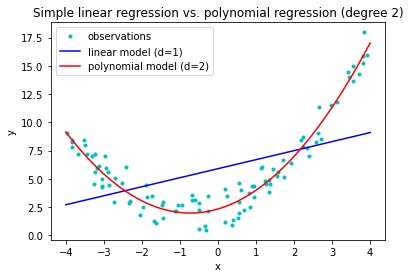

In [26]:
plt.plot(X[:,0], y, 'c.', label='observations')
plt.plot(x_series, y_series_slr, 'b-', label='linear model (d=1)')
plt.plot(x_series, y_series_pr, 'r-', label='polynomial model (d=2)')
plt.title('Simple linear regression vs. polynomial regression (degree 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

From the plot, we see clearly that the quadratic model is a much better fit to the data.

### Compare models using goodness of fit

Besides RMSE, let's also get the $R^2$ for our two models. Recall the formula for $R^2$:
\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}


### Exercise 1.4 (2 points)

Fill in the function <code>r_squared()</code> using the equation above.

<p></p>

<details>
    <summary><font size="3" color="green"><b>Hint here!</b></font></summary>
    Use the <code>np.square()</code> function to square each of the elements of a vector.
</details>

In [27]:
theta_pr

array([[2.34050076],
       [0.98429914],
       [0.67175588]])

In [28]:
print(X_aug.shape)
print(theta_pr.shape)

(100, 3)
(3, 1)


In [29]:
y_pred = np.dot(X_aug, theta_pr)
assert y_pred.shape == y.shape

In [30]:
def r_squared(y, y_pred):
    sse =  np.sum((y - y_pred) **2)
    tse =  np.sum((y - np.mean(y)) **2)
    r_sqr = 1 - (sse/tse)
    return r_sqr
#     raise NotImplementedError()
    

In [31]:
print('Fit of simple linear regression model: %.4f' % r_squared(y, y_pred_slr))
print('Fit of polynomial regression model: %.4f' % r_squared(y, y_pred_pr))

# Test function: Do not remove
assert np.round(r_squared(np.array([1, 2, 3]), np.array([1, 2, 3]))) == np.round(1.0), "r_squared is incorrect"
assert np.round(r_squared(y, y_pred_pr), 4) == np.round(0.9353, 4), "r_squared is incorrect"
print("success!")
# End Test function

Fit of simple linear regression model: 0.2254
Fit of polynomial regression model: 0.9353
success!


**Expected output:**\
Fit of simple linear regression model: 0.2254\
Fit of polynomial regression model: 0.9353


So we see again the superior fit of the quadratic model using $R^2$ (0.94 vs. 0.23).

### Compare models using residual histograms

Next, let's look at another useful analysis: histograms of each model's residuals. Rather than
summarizing the residuals with RMSE or $R^2$, we'll need a function to calculate a vector of
residuals. Then we'll be able to make histograms.

### Exercise 1.5 (2 points)

Fill in function <code>residual_error()</code> to find the residual error vector $\mathbf{y} - \hat{\mathbf{y}}$.

Once we have that function, we can calculate <code>error_slr</code> for the simple linear regression
and <code>error_pr</code> for the polynomial regression.

In [32]:
def residual_error(y, y_pred):
    error = y - y_pred
    return error
    
#     raise NotImplementedError()
#     return error

error_slr = residual_error(y, y_pred_slr)
error_pr = residual_error(y, y_pred_pr)

## The below chart shows a hugely shrunk deviatoin from rmse for polynomial model

error_slr sample: [-4.88494741 -0.58280848 -2.8007543  -5.27887921 -2.27906541]
error_pr sample: [-1.49521216  0.67105966  0.15715854 -1.86746535  1.14869785]


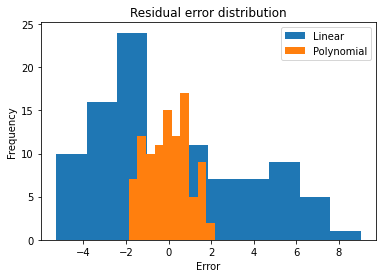

success!


In [33]:
# Plot distribution of residual error for each model
print("error_slr sample:", error_slr[0:5, 0].T)
print("error_pr sample:", error_pr[0:5, 0].T)

plt.hist(error_slr, bins=10, label = 'Linear')
plt.hist(error_pr, bins=10, label = 'Polynomial')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Residual error distribution')
plt.legend()
plt.show()

# Test function: Do not remove
assert np.array_equal(np.round(get_predictions(np.array([1, 9, 2, -9]), theta_slr).T),
                      np.round([[6.70364883, 13.09055058, 7.50201155, -1.27997835]])), "predict from theta_slr is incorrect"
assert np.array_equal(np.round(get_predictions(np.array([0, 7, 1.5, -0.3]), theta_pr).T),
                      np.round([[2.34050076, 42.14663283, 5.3284002, 2.10566904]])), "predict from theta_pr is incorrect"
print("success!")
# End Test function

**Expected output:**\
error_slr sample: [-4.88494741 -0.58280848 -2.8007543  -5.27887921 -2.27906541]\
error_pr sample: [-1.49521216  0.67105966  0.15715854 -1.86746535  1.14869785]

The residual plot again shows clearly how much better the polynomial model is than the linear model.

## Example 2: Sales data

Next, let's model some real data, in particular,
monthly sales data from Kaggle using polynomial regression with varying degree.

We will observe the effects of varying the degree of the polynomial regression fit on the prediction accuracy.

However, as discussed in class,
as models become more complex, we will encounter the issue of *overfitting*, in which a too-powerful
model starts to model the noise in the specific training set rather than the overall trend.

To ensure that we're not fitting the noise in the training set, we will split the data into seaparte train and test/validation datasets.
The training dataset will consist of 60% of the original observations, and the test dataset will consist of the remaining 40% of the observations.

For various polynomial degrees, we'll estimate optimal parameters $\theta$, from the
training set, then we'll use the test/validation dataset to measure the accuracy of the optimized model.

First, let's read the data from the CSV file and set up variables <code>X_data</code>, <code>y_data</code>.

In [34]:
# Import CSV
data = np.genfromtxt('MonthlySales_data.csv',delimiter = ',', dtype=str)

# Extract headers
headers = data[0,:]
print("Headers:", headers)

# Extract raw data
data = np.array(data[1:,:], dtype=float);
mean = np.mean(data,axis=0)
std = np.std(data,axis=0)
data_norm = (data-mean)/std

# Extract y column from raw data
y_index = np.where(headers == 'sale amount')[0][0];
y_data = data[:,y_index];

# Extract x column (just the month) from raw data
month_index = np.where(headers == 'month')[0][0]
# print(year_index, month_index)
X_data = data[:,[month_index]];
m = X_data.shape[0]
n = X_data.shape[1]
X_data = X_data.reshape(m, n)

print('Extracted %d monthly sales records' % m)
print(X_data.shape)
print(y_data.shape)

Headers: ['year' 'month' 'sale amount']
Extracted 240 monthly sales records
(240, 1)
(240,)


### Plot the data

Although year and month are discrete variables, they are also ordinal, so they can be
treated as real values. Let's plot sales month against sales amount as a scatter plot, and
we'll see the discrete nature of the data:

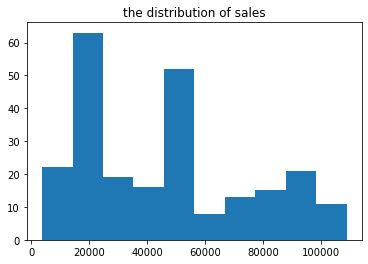

In [35]:
plt.hist(y_data)
plt.title('the distribution of sales')
plt.show()

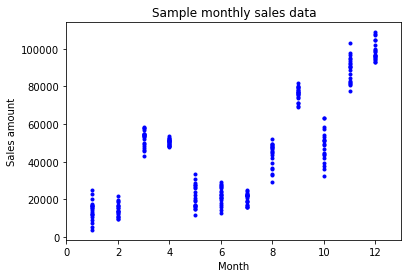

In [36]:
fig = plt.figure()
xx1 = X_data[:,0]
yy1 = y_data

plt.plot(xx1, yy1, 'b.')
plt.xlim(0, 13)
plt.xlabel('Month')
plt.ylabel('Sales amount')
plt.title('Sample monthly sales data')
plt.show()

### Partition the data

Next let's split the overall dataset into subsets for training and validation (test).

### Exercise 1.6 (2 points)

Partition <code>X_data</code> and <code>y_data</code> into training and test datasets
 - Let the training set be 60% of the dataset
 - Let the rest be the test set
 - Shuffle the dataset before splitting it to ensure a similar distribution in the two subsets
 
You can use the [<code>random.shuffle()</code> function](https://www.w3schools.com/python/ref_random_shuffle.asp)</link> to shuffle the indices of the dataset.

In [37]:
percent_train = .6

def partition(X, y, percent_train):
    # Create a list of indices into X and y
    idx = np.arange(0,y.shape[0])
    random.seed(1412)
    random.shuffle(idx)

    # just make sure the shuffle always the same please do not remove
    # On your own, do the following:
    # 1. shuffle the idx list
    # 2. Create lists of indices train_idx and test_idx for the train and test sets
    # 3. Set variables X_train, y_train, X_test, and y_test using those index lists

    start_stop_idx = int(percent_train * len(idx))
    X_train = X_data[idx[:  start_stop_idx]]
    X_test  = X_data[idx[start_stop_idx: ]]
    
    y_train = y_data[idx[: start_stop_idx]]
    y_test =  y_data[idx[start_stop_idx:]]
    
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return idx, X_train, y_train, X_test, y_test

In [38]:
idx, X_train, y_train, X_test, y_test = partition(X_data, y_data, percent_train)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(idx[5:9])

# Test function: Do not remove
assert not np.array_equal(np.round(X_data[0:144, :], 3), np.round(X_train,3)), "X_train must be shuffled!"
assert not np.array_equal(np.round(X_data[144:, :], 3), np.round(X_test,3)), "X_test must be shuffled!"
assert not np.array_equal(np.round(y_data[0:144], 3), np.round(y_train,3)), "y_train must be shuffled!"
assert not np.array_equal(np.round(y_data[144:], 3), np.round(y_test,3)), "y_test must be shuffled!"
assert np.array_equal(idx[5:9], [26, 75, 51, 162])
print("success!")
# End Test function

(144, 1)
(144,)
(96, 1)
(96,)
[ 26  75  51 162]
success!


**Expected output:**\
(144, 1)\
(144,)\
(96, 1)\
(96,)\
[ 26  75  51 162]

### Set up for polynomial regression

Next, let's implement the transformation of a variable $x$ into the
expanded list $\begin{bmatrix} x & x^2 & \cdots & x^d \end{bmatrix}$.

### Exercise 1.7 (2 points)

Fill in function <code>x_polynomial()</code> with code to output
a row vector consisting of the elements $x, x^2, \ldots, x^d$, where
when $d$ is the degree of the polynomial.

In [39]:
def x_polynomial(x, d):

    X = np.zeros((len(x), d+1))
    for degree in range(d+1):
        X[:, degree] = (x**degree).flatten() #need to flatten to be able to insert inside
    return X
#     raise NotImplementedError()
#     return X

In [40]:
print(x_polynomial(np.array([[3],[2]]), 5))
print(x_polynomial(np.array([[3],[2]]), 5).shape)

Xi_train = x_polynomial(X_train, 1)    
Xi_test = x_polynomial(X_test, 1)

# Test function: Do not remove
assert x_polynomial(np.array([[2],[3]]), 5).shape[1] == 5 + 1, "Size of polynomial incorrect"
assert np.array_equal(np.round(x_polynomial(np.array([[2],[3]]), 5), 3), 
                      np.round([[1, 2, 4, 8, 16, 32], [1, 3, 9, 27, 81, 243]],3)), "Polynomial are wrong."
print("success!")
# End Test function

[[  1.   3.   9.  27.  81. 243.]
 [  1.   2.   4.   8.  16.  32.]]
(2, 6)
success!


**Expected output:**\
[[  1.   3.   9.  27.  81. 243.]\
 [  1.   2.   4.   8.  16.  32.]]\
(2, 6)

### Write the cost function

Next let's implmeent to cost function for a given set of parameters $\theta$.

### Exercise 1.8 (2 points)

Fill in function <code>cost()</code> with appropriate code. Use a constant of $\frac{1}{2m}$ out front.

In [41]:
theta = regression(Xi_train, y_train)


In [42]:
theta

array([6928.44582392, 6354.15590081])

In [43]:
def cost(theta, X, y):
    predicted = np.dot(X, theta)
    error = predicted - y
    J =  np.sum(error**2) / (2*len(X))
    
    return J
    # YOUR CODE HERE
#     raise NotImplementedError()
   

In [44]:
# calculate theta
theta = regression(Xi_train, y_train)

# calculate cost in train
J_train = cost(theta, Xi_train, y_train)

y_pred_test = h(Xi_test, theta)
J_test = cost(theta, Xi_test, y_test)

print("J_train:", J_train)
print("J_test:", J_test)

# Test function: Do not remove
assert type(J_train) == np.float64, "Cost function size must be 1"
assert np.round(J_train, 3) == np.round(174395635.44334993, 3), "Cost function for train set is wrong"
assert np.round(J_test, 3) == np.round(196382485.91395777, 3), "Cost function for test set is wrong"
print("success!")
# End Test function

J_train: 174395635.44334996
J_test: 196382485.91395798
success!


**Expected output:**\
J_train: 174395635.44334993\
J_test: 196382485.91395777

### Try models of varying degree

Next we'll build multiple polynomial regression models with different degree, using sales
month as the independent variable and sales amount as the dependent variable.

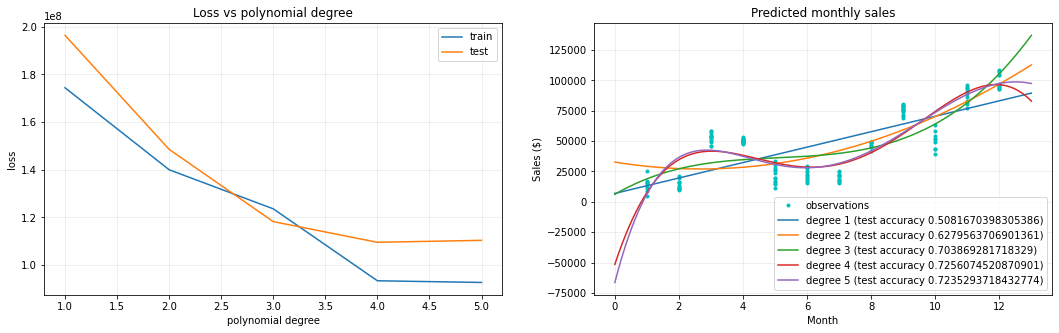

In [45]:
max_degree = 5

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):
    # Fit model on training data and get cost for training and test data
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regression(Xi_train, y_train)    
    J_train[i-1] = cost(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = cost(theta, Xi_test, y_test)
    
    # Plot
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

Take some time to undserstand the code. You should see that training loss falls as the degree of the polynomial increases. However, depending on your particular train/test split of the data, you may observe at $d=4$ or $d=5$ that test loss starts to flatten out or even increase. This is the phenomenon of overfitting!

If you don't see any evidence of overfitting, you might regenerate the test/train splits (comment out the seed
setting in the partition function and re-run the rest of the cells, but don't forget to put the seed back before
turning in your solution!).

You may also increase max_degree to a point. However, without normalization of the data, the matrix $\texttt{X}^\top\texttt{X}$ we invert in the solution to the normal equations will become numerically close to singularity, and you will observe unstable solutions. The result is usually a parameter vector $\theta$ that is suboptimal that gives poor results on both the training set and test set.

If you want to evaluate the numerial stability of the correlation matrix $\texttt{X}^\top\texttt{X}$, try this code:

In [46]:
corr = Xi_train.T.dot(Xi_train)
print('Correlation matrix:', corr)
cond = np.linalg.cond(corr)
print('Condition number: %0.5g' % cond)

Correlation matrix: [[1.44000000e+02 9.34000000e+02 7.73800000e+03 7.24420000e+04
  7.25962000e+05 7.58679400e+06]
 [9.34000000e+02 7.73800000e+03 7.24420000e+04 7.25962000e+05
  7.58679400e+06 8.15402980e+07]
 [7.73800000e+03 7.24420000e+04 7.25962000e+05 7.58679400e+06
  8.15402980e+07 8.94004282e+08]
 [7.24420000e+04 7.25962000e+05 7.58679400e+06 8.15402980e+07
  8.94004282e+08 9.94854740e+09]
 [7.25962000e+05 7.58679400e+06 8.15402980e+07 8.94004282e+08
  9.94854740e+09 1.11986452e+11]
 [7.58679400e+06 8.15402980e+07 8.94004282e+08 9.94854740e+09
  1.11986452e+11 1.27211760e+12]]
Condition number: 6.5793e+12


In [47]:
import pandas as pd

In [48]:
np.linalg.inv(corr)

array([[ 1.73467414e+00, -2.18611850e+00,  8.90776405e-01,
        -1.57076422e-01,  1.24685790e-02, -3.65446938e-04],
       [-2.18611850e+00,  2.94031142e+00, -1.24186888e+00,
         2.24044373e-01, -1.80671545e-02,  5.35664566e-04],
       [ 8.90776405e-01, -1.24186888e+00,  5.38689877e-01,
        -9.91176099e-02,  8.11244260e-03, -2.43290605e-04],
       [-1.57076422e-01,  2.24044373e-01, -9.91176099e-02,
         1.85301959e-02, -1.53600770e-03,  4.65351234e-05],
       [ 1.24685790e-02, -1.80671545e-02,  8.11244260e-03,
        -1.53600770e-03,  1.28666616e-04, -3.93188975e-06],
       [-3.65446938e-04,  5.35664566e-04, -2.43290605e-04,
         4.65351234e-05, -3.93188975e-06,  1.21026285e-07]])

In [49]:
pd.DataFrame(corr)

,0,1,2,3,4,5
0,144.0,934.0,7738.0,7.244200e+04,7.259620e+05,7.586794e+06
1,934.0,7738.0,72442.0,7.259620e+05,7.586794e+06,8.154030e+07
2,7738.0,72442.0,725962.0,7.586794e+06,8.154030e+07,8.940043e+08
3,72442.0,725962.0,7586794.0,8.154030e+07,8.940043e+08,9.948547e+09
4,725962.0,7586794.0,81540298.0,8.940043e+08,9.948547e+09,1.119865e+11
5,7586794.0,81540298.0,894004282.0,9.948547e+09,1.119865e+11,1.272118e+12


Read more about the condition number on <link>[Wikipedia](https://en.wikipedia.org/wiki/Condition_number)</link>. Roughly speaking, if our condition number is $10^k$, we may lose up to $k$ digits of accuracy in the inverse of the matrix. If $k=12$ as above, then we have an extremely poorly conditioned problem, because the IEEE 64 bit floating point representation of reals we're using in Python only has around 16 digits of accuracy (see <link>[Wikipedia's page on IEEE floating point numbers](https://en.wikipedia.org/wiki/IEEE_754)</link>).

One way to improve the numerical conditioning of the problem is normalization. If the values of the variables we
are correlating in this matrix have relatively small positive and negative values, the condition number of the correlation matrix will be much smaller and you'll get better results.

## In-lab exercises

During the lab session, you should perform the following exercises:
1. Add the `year` variable from the monthly sales dataset to your simple linear regression model and quantify
   whether including it improves test set performance. Show
   the observations and predictions in a 3D surface plot.
2. Develop polynomial regression models of degree 2 and 3 based on the two input variables. Show results
   as 3D surface plots and discuss whether you observe overfitting
   or not.


### Exercise 2.1 (2 points)

Import **MonthlySales_data.csv** file into <code>data_csv</code> and extract **headers**  at the top of <code>data_csv</code> into <code>headers_csv</code>.

In [50]:
# YOUR CODE HERE
all_data = np.genfromtxt('MonthlySales_data.csv', delimiter = ',', dtype = str) #must import as string first to cover headers
headers_csv = all_data[0]
data_csv = all_data[1:].astype(float) # then for real data, convert from string to float
# raise NotImplementedError()

In [51]:
print(headers_csv)
print(data_csv[:5])

['year' 'month' 'sale amount']
[[1.995000e+03 1.000000e+00 1.238611e+04]
 [1.995000e+03 2.000000e+00 1.532923e+04]
 [1.995000e+03 3.000000e+00 5.800217e+04]
 [1.995000e+03 4.000000e+00 5.130520e+04]
 [1.995000e+03 5.000000e+00 1.645247e+04]]


In [52]:
print(headers_csv)
print(data_csv[:5])

# Test function: Do not remove
assert type(data_csv[0,0]) == np.float64, "You must remove the header"
assert headers_csv.shape[0] == 3, "Headers must have 3 values"
assert type(headers_csv[0]) == np.str_, "Headers must be string"
assert np.round(data_csv[30, 2], 3) == np.round(2.222027e+04, 3), "Data is incorrect"
print("success!")
# End Test function

['year' 'month' 'sale amount']
[[1.995000e+03 1.000000e+00 1.238611e+04]
 [1.995000e+03 2.000000e+00 1.532923e+04]
 [1.995000e+03 3.000000e+00 5.800217e+04]
 [1.995000e+03 4.000000e+00 5.130520e+04]
 [1.995000e+03 5.000000e+00 1.645247e+04]]
success!


**Expected output**:\
['year' 'month' 'sale amount']\
[[1.995000e+03 1.000000e+00 1.238611e+04]\
 [1.995000e+03 2.000000e+00 1.532923e+04]\
 [1.995000e+03 3.000000e+00 5.800217e+04]\
 [1.995000e+03 4.000000e+00 5.130520e+04]\
 [1.995000e+03 5.000000e+00 1.645247e+04]]

### Exercise 2.2 (2 points)

- Extract **sale amount** column into <code>y_csv</code>
- Extract **year** and **month** columns into <code>X_csv</code> by use **year** at column index 0 and **month** at column index 1

In [53]:
# Extract y column from raw data
# Extract x column (year and month) from raw data
y_csv = data_csv[: ,2]
X_csv = data_csv[: ,:2]
# raise NotImplementedError()

In [54]:
m = X_csv.shape[0]
n = X_csv.shape[1]
X_csv = X_csv.reshape(m, n)
print('Extracted %d sales records' % m)
print('number of x set:', n)

# Test function: Do not remove
assert m == 240, "Sales records incorrect"
assert n == 2, "Need to extract 2 columns of X set"
assert np.max(X_csv[:,0]) == 2014 and np.min(X_csv[:,0]) == 1995, "Year is filled wrong column"
assert np.max(X_csv[:,1]) == 12 and np.min(X_csv[:,1]) == 1, "Month is filled wrong column "
print("success")
# End Test function

Extracted 240 sales records
number of x set: 2
success


**Expected output**:\
Extracted 240 sales records\
number of x set: 2

### Exercise 2.3 (2 points)

Plot a 3D graph using the <code>mpl_toolkits.mplot3d</code> library.

<p></p>

<details>
    <summary><font size="3" color="green"><b>Hint here!</b></font></summary>
    Refer to the [matplotlib documentation page](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
    for an example.
</details>

In [55]:
from mpl_toolkits.mplot3d import Axes3D

In [56]:
X_csv[:5]

array([[1.995e+03, 1.000e+00],
       [1.995e+03, 2.000e+00],
       [1.995e+03, 3.000e+00],
       [1.995e+03, 4.000e+00],
       [1.995e+03, 5.000e+00]])

In [57]:
X_csv[:, 1]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,
        5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,
        7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
        9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,
       10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,
       11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1

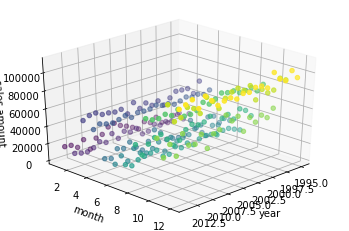

In [58]:
# Plot the data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year =  X_csv[:, 0] 
y_month =  X_csv[:, 1] 
z_sale = y_csv

# 3. plot by using scatter

ax.scatter(xs = x_year, ys= y_month, zs = z_sale, c = y_month)

# 4. set x, y, z label

ax.set_xlabel('year')
ax.set_ylabel('month')
ax.set_zlabel('sales amount')

ax.view_init(30, 45)
# raise NotImplementedError()

plt.show()

In [59]:
# Test function: Do not remove
assert ax.get_xbound()[1] >= 2014 and ax.get_xbound()[0] <= 1995, "Year is filled wrong column"
assert ax.get_ybound()[1] >= 12 and ax.get_ybound()[0] <= 1, "Month is filled wrong column"
assert ax.get_zbound()[1] >= 100000 and ax.get_zbound()[0] <= 0, "Year is filled wrong column"
assert 'year' in ax.get_xlabel().lower(), "x-axis label is incorrect"
assert 'month' in ax.get_ylabel().lower(), "y-axis label is incorrect"
assert 'sale' in ax.get_zlabel().lower(), "y-axis label is incorrect"
print("success")
# End Test function

success


**Expected output:**\
<img src="lab02-01.png">

### Exercise 2.4 (2 points)

Extract 60% of the data to the training set and the remaining 40% to the test set with shuffling.

You can use the <code>partitions</code> function we already made or create a new function. Make sure
that you use <code>random.seed(1412)</code> to make sure that the result is the same as the expect result.
Place the resulting data in variables <code>idx, X_train, y_train, X_test, y_test</code>.

In [60]:
X_csv.shape

(240, 2)

In [61]:
random.seed(1412)
idx = np.arange(len(X_csv))
random.shuffle(idx)
train_sample = 0.6
start_stop_index = int(train_sample * len(idx))

X_train = X_csv[idx[:start_stop_index]]
X_test = X_csv[idx[start_stop_index :]]

y_train = y_csv[idx[:start_stop_index]]
y_test = y_csv[idx[start_stop_index : ]]
# YOUR CODE HERE
# raise NotImplementedError()

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(idx[5:9])

# Test function: Do not remove
assert not np.array_equal(np.round(X_csv[0:144, :], 3), np.round(X_train,3)), "X_train must be shuffled!"
assert not np.array_equal(np.round(X_csv[144:, :], 3), np.round(X_test,3)), "X_test must be shuffled!"
assert not np.array_equal(np.round(y_csv[0:144], 3), np.round(y_train,3)), "y_train must be shuffled!"
assert not np.array_equal(np.round(y_csv[144:], 3), np.round(y_test,3)), "y_test must be shuffled!"
assert np.array_equal(idx[5:9], [26, 75, 51, 162])
print("success!")
# End Test function

(144, 2)
(144,)
(96, 2)
(96,)
[ 26  75  51 162]
success!


**Expected output**:\
(144, 2)\
(144,)\
(96, 2)\
(96,)\
[ 26  75  51 162]

### Exercise 2.5 (2 points)

1. Create <code>Xi_train, Xi_Test</code>. X sets must be polynomial of $n=1$.
2. Calculate <code>theta</code>
2. Calculate <code>y_pred_test</code>
2. Calculate cost function $J$ from train and test set

In [63]:
#first insert intercept on both X_train and X_test
Xi_train = np.insert(X_train, 0, 1, axis =1)
Xi_test = np.insert(X_test, 0, 1, axis =1)

In [64]:
def analytical_method(X, y):
    inverse  = np.linalg.inv(np.dot(X.T, X))
    right = np.dot(X.T,y)
    theta = np.dot(inverse, right)
    return theta


def cost(y_true, y_pred):
    assert y_true.shape == y_pred.shape, 'not of the same shape'
    error  = y_true - y_pred
    J = np.sum(error**2) /   (2* len(y_true))
    return J

In [65]:
Xi_train = np.insert(X_train, 0, 1, axis =1)
Xi_test = np.insert(X_test, 0, 1, axis =1)
theta = analytical_method(Xi_train, y_train)
y_pred_train = np.dot(Xi_train, theta)
y_pred_test = np.dot(Xi_test, theta)
J_train = cost(y_train, y_pred_train)
J_test = cost(y_test, y_pred_test)



# YOUR CODE HERE
# raise NotImplementedError()

In [66]:
print("Xi_train[:3]:", np.round(Xi_train[:3], 2))
print("Xi_test[:3]:", np.round(Xi_test[:3], 2))
print("theta:", theta)
print("y_pred_test[:5]:", np.round(y_pred_test[:5].T, 2))
print("J_train:", J_train)
print("J_test:", J_test)

# Test function: Do not remove
assert np.array_equal(np.round(theta, 3), np.round([5.74503812e+05, -2.83158807e+02, 6.37579347e+03],3)), "Regression theta is incorrect"
assert np.round(J_train, 0) == np.round(172968387.44854635, 0), "Train cost is incorrect"
assert np.round(J_test, 0) == np.round(204275431.7643744, 0), "Test cost is incorrect"
print("success")
# End Test function

Xi_train[:3]: [[1.000e+00 2.003e+03 1.100e+01]
 [1.000e+00 2.004e+03 3.000e+00]
 [1.000e+00 2.002e+03 6.000e+00]]
Xi_test[:3]: [[1.000e+00 2.008e+03 1.000e+01]
 [1.000e+00 1.997e+03 5.000e+00]
 [1.000e+00 2.006e+03 1.100e+01]]
theta: [ 5.74503812e+05 -2.83158807e+02  6.37579347e+03]
y_pred_test[:5]: [69678.86 40914.64 76620.97 79169.4  48852.53]
J_train: 172968387.44854638
J_test: 204275431.76439014
success


**Expected output**:\
Xi_train[:3]: [[1.000e+00 2.003e+03 1.100e+01]\
 [1.000e+00 2.004e+03 3.000e+00]\
 [1.000e+00 2.002e+03 6.000e+00]]\
Xi_test[:3]: [[1.000e+00 2.008e+03 1.000e+01]\
 [1.000e+00 1.997e+03 5.000e+00]\
 [1.000e+00 2.006e+03 1.100e+01]]\
theta: [5.74503812e+05 -2.83158807e+02  6.37579347e+03]\
y_pred_test[:5]: [69678.86 40914.64 76620.97 79169.4  48852.53]\
J_train: 172968387.44854635\
J_test: 204275431.7643744

### Exercise 2.6 (2 points)

Create a mesh of grid points in order to obtain a surface plot later.

<p></p>

<details>
    <summary><font size="3" color="green"><b>Hint here!</b></font></summary>
    Create a mesh grid using [<code>numpy.meshgrid()</code>](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
</details>

In [67]:
Xi_train[:3]

array([[1.000e+00, 2.003e+03, 1.100e+01],
       [1.000e+00, 2.004e+03, 3.000e+00],
       [1.000e+00, 2.002e+03, 6.000e+00]])

In [68]:
print(min(Xi_train[:, 1]))
print(max(Xi_train[:, 1]))

1995.0
2014.0


In [69]:
print(min(Xi_train[:, 2]))
print(max(Xi_train[:, 2]))

1.0
12.0


In [70]:
# 1. Create mesh grid x_mesh, y_mesh
#    Hint: this step do in input X dataset only (year, and month series)
# 1.1 use numpy.linspace() to generate x_series and y_series
#     - do x_series in between min(year) - 1 to max(year) + 1
#     - do y_series in between min(month) - 1 to max(month) + 1
#     - num_linspace = 100
# 1.2 use numpy.meshgrid() to generate x_mesh, and y_mesh
# 1.3 merge x_mesh and y_mesh to be xy_mesh
num_linspace = 100
x_series = np.linspace(start = min(Xi_train[:, 1]) - 1, stop = max(Xi_train[:, 1]) + 1, num= num_linspace )
y_series = np.linspace(start = min(Xi_train[:, 2]) - 1, stop = max(Xi_train[:, 2]) + 1, num= num_linspace )
x_mesh, y_mesh = np.meshgrid(x_series, y_series)
xy_mesh = np.dstack((x_mesh, y_mesh)) #dstack!!!!!!!
print(f'xy_mesh shape: {xy_mesh.shape}')

# 2. predict output from xy_mesh to be z_series
#    Hint: use mesh_predictions function instead of get_prediction
def mesh_predictions(x, theta):
    x = np.insert(x, 0, 1, axis=x.ndim-1)
    theta = theta.reshape(-1,1)
    y = x@theta
          
    print(f"x dim: {x.ndim}")      
    print(f"x shape: {x.shape}")
    print(x[:2, :2, :])
    print(f"theta shape: {theta.shape}")
    
    return y


z_series = mesh_predictions(xy_mesh, theta)
z_series = z_series.flatten().reshape(100, -1)

# YOUR CODE HERE
# raise NotImplementedError()

xy_mesh shape: (100, 100, 2)
x dim: 3
x shape: (100, 100, 3)
[[[1.00000000e+00 1.99400000e+03 0.00000000e+00]
  [1.00000000e+00 1.99421212e+03 0.00000000e+00]]

 [[1.00000000e+00 1.99400000e+03 1.31313131e-01]
  [1.00000000e+00 1.99421212e+03 1.31313131e-01]]]
theta shape: (3, 1)


In [71]:
xy_mesh.shape

(100, 100, 2)

In [72]:
xy_mesh[1,1, :]

array([1.99421212e+03, 1.31313131e-01])

In [73]:
xy_mesh[0].shape

(100, 2)

In [74]:
print("xy_mesh.shape", xy_mesh.shape)
print("z_series.shape", z_series.shape)
#print("xy_mesh", xy_mesh)
#print("z_series", z_series)

# Test function: Do not remove
assert xy_mesh.shape == (num_linspace, num_linspace, 2), "mesh shape is incorrect"
assert z_series.shape == (num_linspace, num_linspace), "z_series is incorrect"
print("success")
# End Test function

xy_mesh.shape (100, 100, 2)
z_series.shape (100, 100)
success


**Expected output**:\
xy_mesh.shape (100, 100, 2)\
z_series.shape (100, 100)


### Exercise 2.6 (2 points)

Make a surface plot for theta with the dataset points from <code>xy_mesh</code> and <code>z_series</code>
variables created above.

<p></p>

<details>
    <summary><font size="3" color="green"><b>Hint here!</b></font></summary>
    You can use the [<code>Axes3D.plot_surface()</code> function](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html).
</details>

In [75]:
Xi_train[:5]

array([[1.000e+00, 2.003e+03, 1.100e+01],
       [1.000e+00, 2.004e+03, 3.000e+00],
       [1.000e+00, 2.002e+03, 6.000e+00],
       [1.000e+00, 2.012e+03, 4.000e+00],
       [1.000e+00, 1.999e+03, 1.000e+01]])

In [76]:
y_train[:5]

array([96606.11, 52139.68, 22494.46, 50123.44, 51478.61])

In [77]:
x_year

array([1995., 1995., 1995., 1995., 1995., 1995., 1995., 1995., 1995.,
       1995., 1995., 1995., 1996., 1996., 1996., 1996., 1996., 1996.,
       1996., 1996., 1996., 1996., 1996., 1996., 1997., 1997., 1997.,
       1997., 1997., 1997., 1997., 1997., 1997., 1997., 1997., 1997.,
       1998., 1998., 1998., 1998., 1998., 1998., 1998., 1998., 1998.,
       1998., 1998., 1998., 1999., 1999., 1999., 1999., 1999., 1999.,
       1999., 1999., 1999., 1999., 1999., 1999., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2001., 2001., 2001., 2001., 2001., 2001., 2001., 2001., 2001.,
       2001., 2001., 2001., 2002., 2002., 2002., 2002., 2002., 2002.,
       2002., 2002., 2002., 2002., 2002., 2002., 2003., 2003., 2003.,
       2003., 2003., 2003., 2003., 2003., 2003., 2003., 2003., 2003.,
       2004., 2004., 2004., 2004., 2004., 2004., 2004., 2004., 2004.,
       2004., 2004., 2004., 2005., 2005., 2005., 2005., 2005., 2005.,
       2005., 2005.,

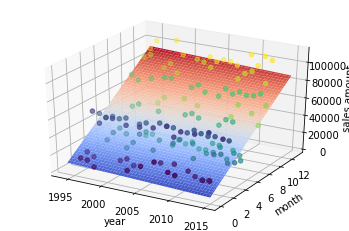

In [78]:
fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year = Xi_train[:, 1]
y_month = Xi_train[:, 2]
z_sale = y_train

# 3. plot by using scatter

ax.scatter(xs = x_year, ys = y_month, zs = z_sale, c=y_month)
# 4. set x, y, z label


ax.set_xlabel('year')
ax.set_ylabel('month')
ax.set_zlabel('sales amount')


#    Hint: In these 3, 4 steps, you can copy Exercise 2.3
# 5. Plot surface from x_mesh, y_mesh, and z_series
ax.plot_surface(x_mesh, y_mesh, z_series, cmap = 'coolwarm')




# raise NotImplementedError()

plt.show()

In [79]:
# Test function: Do not remove
assert ax.get_xbound()[1] >= 2014 and ax.get_xbound()[0] <= 1995, "Year is filled wrong column"
assert ax.get_ybound()[1] >= 12 and ax.get_ybound()[0] <= 1, "Month is filled wrong column"
assert ax.get_zbound()[1] >= 100000 and ax.get_zbound()[0] <= 0, "Year is filled wrong column"
assert 'year' in ax.get_xlabel().lower(), "x-axis label is incorrect"
assert 'month' in ax.get_ylabel().lower(), "y-axis label is incorrect"
assert 'sale' in ax.get_zlabel().lower(), "y-axis label is incorrect"
print("success")
# End Test function

success


**Expect result:**
<img src="lab02-02.png">

### Exercise 2.7 (20 points)

Develop polynomial regression models of degree 2 and 3 based on the two input variables. Show results as 3D surface plots and discuss whether you observe overfitting or not.

## 2 degrees with 2 variables

In [80]:
def x_polynomial(x_train, degree):
    n = x_train.shape[1] -1
    x_polynomial = np.zeros((len(x_train),  degree * n))
    column = 0
#     print(x_polynomial)
    for feature in range(1, n+1):
        for degree in range(1,degree+1):
#             print(x_train[:, feature] ** degree)
            x_polynomial[: , column] = x_train[:, feature] ** degree
            column +=1 
    x_polynomial = np.insert(x_polynomial, 0 ,1, axis = 1)
    return x_polynomial
    

In [81]:
poly2_train = x_polynomial(Xi_train, degree = 2)
poly2_theta = analytical_method(poly2_train ,y_train )
poly2_train_pred = np.dot(poly2_train, poly2_theta)
poly2_train_cost = cost(y_true = y_train, y_pred = poly2_train_pred)


poly2_test = x_polynomial(Xi_test, degree = 2)
poly2_test_pred = np.dot(poly2_test, poly2_theta)
poly2_test_cost = cost(y_true = y_test, y_pred = poly2_test_pred)


In [82]:
print(poly2_train_cost)
print(poly2_test_cost)

139247908.87033254
153211388.48697641


In [83]:
poly3_train = x_polynomial(Xi_train, degree = 3)
poly3_theta = analytical_method(poly3_train ,y_train )
poly3_train_pred = np.dot(poly3_train, poly3_theta)
poly3_train_cost = cost(y_true = y_train, y_pred = poly3_train_pred)


poly3_test = x_polynomial(Xi_test, degree = 3)
poly3_test_pred = np.dot(poly3_test, poly3_theta)
poly3_test_cost = cost(y_true = y_test, y_pred = poly3_test_pred)

In [84]:
print(poly3_train_cost)
print(poly3_test_cost)

172447092.8216861
121094641.9460073


In [85]:
num_linspace = 100
x_series = np.linspace(start = min(Xi_train[:, 1]) - 1, stop = max(Xi_train[:, 1]) + 1, num= num_linspace )
y_series = np.linspace(start = min(Xi_train[:, 2]) - 1, stop = max(Xi_train[:, 2]) + 1, num= num_linspace )
x_mesh, y_mesh = np.meshgrid(x_series, y_series)
xy_mesh = np.dstack((x_mesh, y_mesh)) #dstack!!!!!!!
print(f'xy_mesh shape: {xy_mesh.shape}')

xy_mesh shape: (100, 100, 2)


In [86]:
output2 = poly2_theta[0] + poly2_theta[1] *x_mesh +poly2_theta[2] * (x_mesh**2) + poly2_theta[3] * (y_mesh) + poly2_theta[4] * (y_mesh**2)

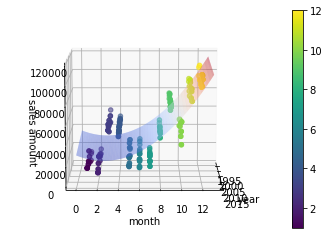

In [87]:
fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year = Xi_train[:, 1]
y_month = Xi_train[:, 2]
z_sale = y_train

# 3. plot by using scatter

ax.scatter(xs = x_year, ys = y_month, zs = z_sale, c=y_month)
# 4. set x, y, z label


ax.set_xlabel('year')
ax.set_ylabel('month')
ax.set_zlabel('sales amount')


#    Hint: In these 3, 4 steps, you can copy Exercise 2.3
# 5. Plot surface from x_mesh, y_mesh, and z_series
ax.plot_surface(x_mesh, y_mesh, output2, cmap = 'coolwarm', alpha = 0.5)



ax.view_init(elev=10, azim = 0)
plt.colorbar(ax.scatter(xs = x_year, ys = y_month, zs = z_sale, c=y_month))
# raise NotImplementedError()

plt.show()

In [88]:
output3 = poly3_theta[0] +(poly3_theta[1] * (x_mesh)) + (poly3_theta[2] * (x_mesh**2))  +  (poly3_theta[3] * (x_mesh**3)) + (poly3_theta[4]* (y_mesh**1)) + (poly3_theta[5]* (y_mesh**2)) +(poly3_theta[6]* (y_mesh**3))

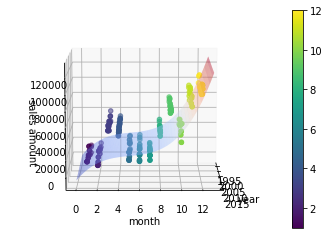

In [89]:
fig = plt.figure()
# 1. Set plot graph as 3D
ax = fig.add_subplot(projection='3d')

# 2. Extract data
# extract year at x-axis
# extract month at y-axis
# extract sale amount at z-axis
x_year = Xi_train[:, 1]
y_month = Xi_train[:, 2]
z_sale = y_train

# 3. plot by using scatter

ax.scatter(xs = x_year, ys = y_month, zs = z_sale, c=y_month)
# 4. set x, y, z label


ax.set_xlabel('year')
ax.set_ylabel('month')
ax.set_zlabel('sales amount')


#    Hint: In these 3, 4 steps, you can copy Exercise 2.3
# 5. Plot surface from x_mesh, y_mesh, and z_series
ax.plot_surface(x_mesh, y_mesh, output3, cmap = 'coolwarm', alpha = 0.5)



ax.view_init(elev=10, azim = 0)
plt.colorbar(ax.scatter(xs = x_year, ys = y_month, zs = z_sale, c=y_month))
# raise NotImplementedError()

plt.show()

In [90]:
train_record = []
test_record = []
for i in range(1, 8):
    poly_train = x_polynomial(Xi_train, degree = i)
    poly_theta = analytical_method(poly_train ,y_train )
    poly_train_pred = np.dot(poly_train, poly_theta)
    poly_train_cost = cost(y_true = y_train, y_pred = poly_train_pred)


    poly_test = x_polynomial(Xi_test, degree = i)
    poly_test_pred = np.dot(poly_test, poly_theta)
    poly_test_cost = cost(y_true = y_test, y_pred = poly_test_pred)
    
    train_record.append(poly_train_cost)
    test_record.append(poly_test_cost)
    
    print(f'train {i}: {poly_train_cost/1000000}')
    print(f'test {i}: {poly_test_cost/1000000}')
    print()
    

train 1: 172.96838744854637
test 1: 204.27543176439013

train 2: 139.24790887033254
test 2: 153.2113884869764

train 3: 172.44709282168608
test 3: 121.0946419460073

train 4: 96.38211151570532
test 4: 125.95120329792967

train 5: 341.43765022267246
test 5: 465.60337019188165

train 6: 119.56918541809279
test 6: 194.37355050566444

train 7: 528.6269261792996
test 7: 642.7603209289169



Text(0, 0.5, 'loss')

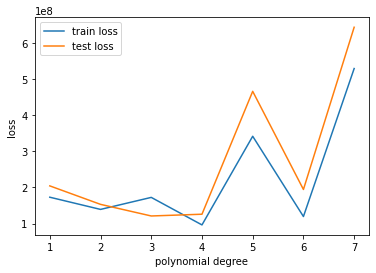

In [91]:
plt.plot(np.arange(1,8) , train_record ,label ='train loss')
plt.plot(np.arange(1,8) , test_record, label ='test loss')
plt.legend()
plt.xlabel('polynomial degree')
plt.ylabel('loss')

### Summary
- For this data set with 2 features, increasing polynomial degree from 1 to 2 reduces the loss both in training and test data, and continue to reduce the test loss with 3 degree polynomial
- From loss chart above, the most effective degree would be around 3 and 4 where test loss is at lowest position, withcausing the data to be over or underfitted
- Increasing degree beyond 4 results in drastic leap in loss function for both train and test set, meaning the model is overfitting


---

## Take-home exercise (50 points)

Using the dataset you played with for the take-home exercise in Lab 01, perform the same analysis. You won't be able to visualize the model well, as you will have more
than two inputs, but try to give some idea of the performance of the model visually. Also, depending on the number of variables in your dataset, you may not be able to
increase the polynomial degree beyond 2. Discuss whether the polynomial model is better than the linear model and whether you observe overfitting.

Insert your code, explanation, and results here.

## To turn in

Before the next lab, turn in a brief report in the form of a Jupyter notebook documenting your work in the lab and the take-home exercise, along with your observations and discussion.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pd.read_csv("CarPurchasing.csv")

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [95]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,28598.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,31169.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,33619.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,53747.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,46375.46248


### Undestanding the data features, and feature selection
- In this dataframe, there are 500 samples of 8 independent features  to predict the the amount of car price people are willing to pay
- Considering the features to input into the model, the 'customer name' and 'customer_email', are not a good predictor as each row contains different unique value
- This data is gathered only from USA, so the 'Country' has only USA value. It should not be included in the model
- As this exercise focuses on implementing polynomial degrees, 'Gender' column after binarized and polynomialized will return in multicollinearity. So, I will drop this column as well

In [96]:
data  = data.select_dtypes(exclude = object)

In [97]:
data =data.drop(columns =['Gender'])

In [98]:
data.head()

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,42,62812.09301,11609.380910,238961.2505,28598.45877
1,41,66646.89292,9572.957136,530973.9078,31169.52566
2,43,53798.55112,11160.355060,638467.1773,33619.70921
3,58,79370.03798,14426.164850,548599.0524,53747.36313
4,57,59729.15130,5358.712177,560304.0671,46375.46248


In [99]:
data.isnull().sum()

Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

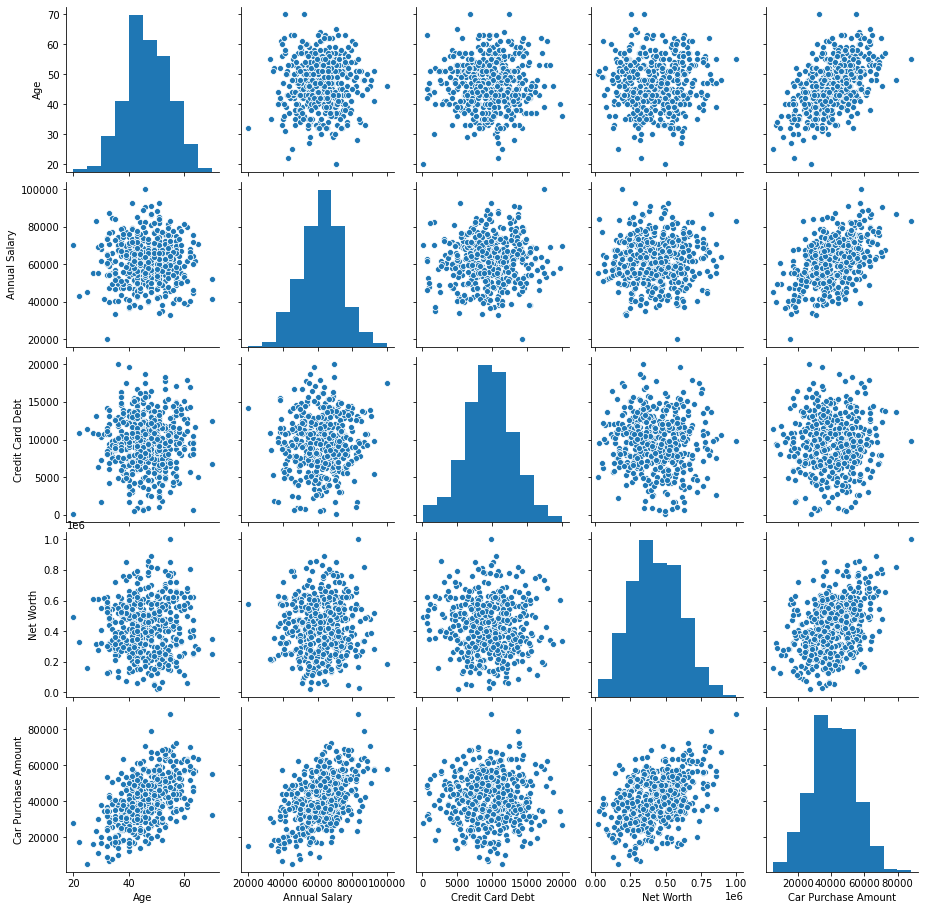

In [100]:
sns.pairplot(data)

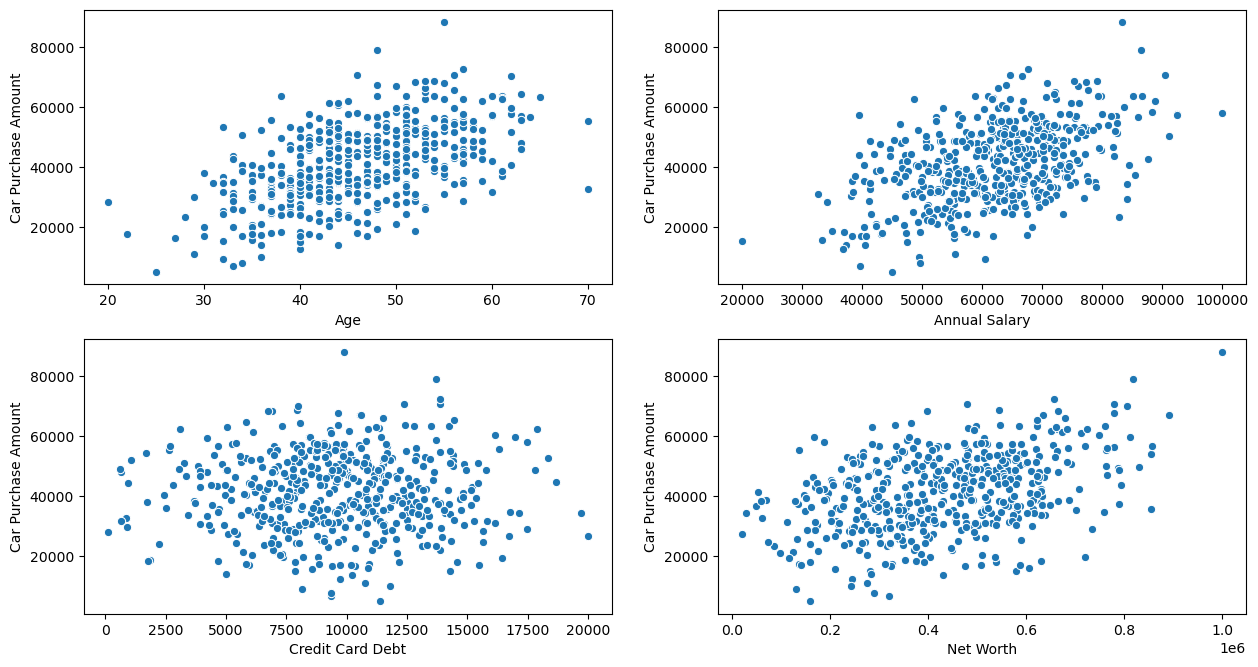

In [101]:
fig, axes = plt.subplots(2,2, figsize = (15,8), dpi = 100)
sns.scatterplot(x =  'Age', y = 'Car Purchase Amount' , data = data, ax =axes[0,0])
sns.scatterplot(x =  'Annual Salary', y = 'Car Purchase Amount' , data = data, ax =axes[0,1])
sns.scatterplot(x =  'Credit Card Debt', y = 'Car Purchase Amount' , data = data, ax =axes[1,0])
sns.scatterplot(x =  'Net Worth', y = 'Car Purchase Amount' , data = data, ax =axes[1,1])

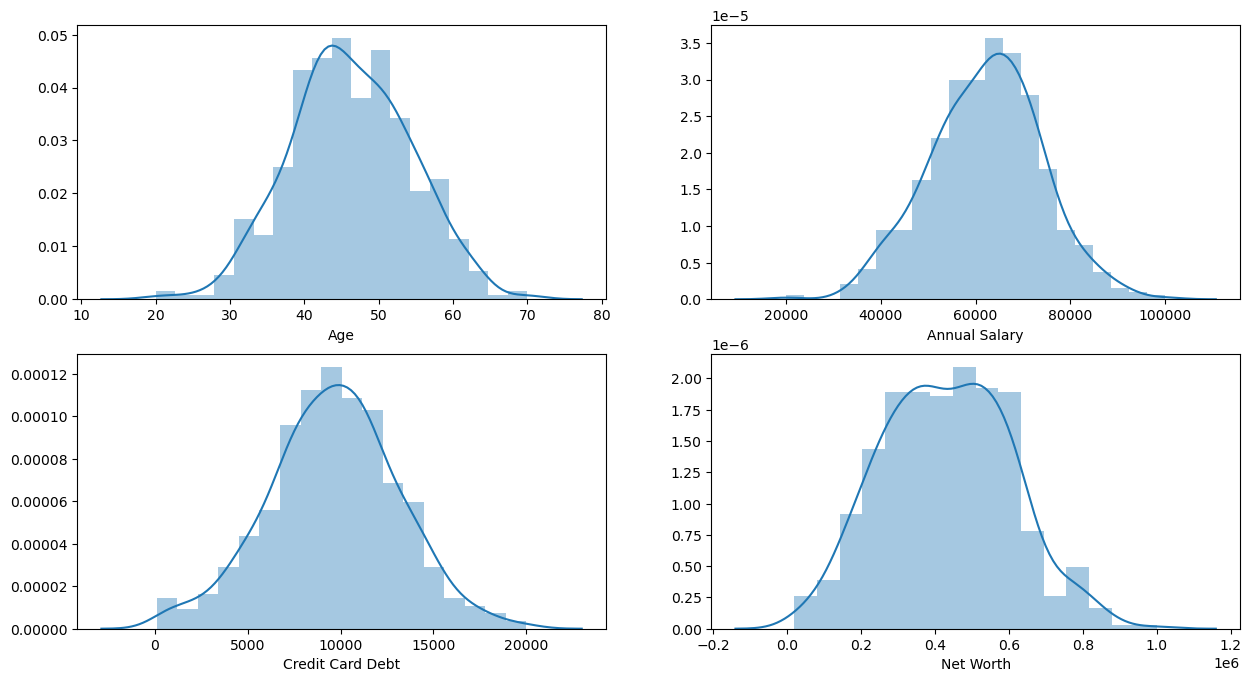

In [102]:
fig, axes = plt.subplots(2,2, figsize = (15,8), dpi = 100)
sns.distplot(data['Age'], ax =axes[0,0])
sns.distplot(data['Annual Salary'], ax =axes[0,1])
sns.distplot(data['Credit Card Debt'], ax =axes[1,0])
sns.distplot(data['Net Worth'], ax =axes[1,1])


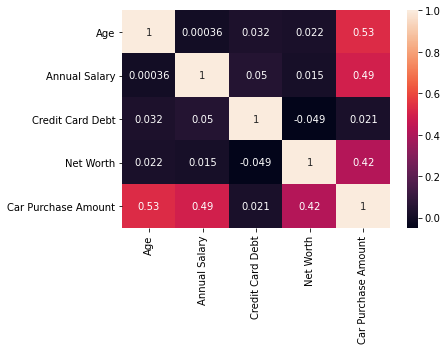

In [103]:
sns.heatmap(data.corr(), annot = True)

### Summary from Exploratory Data 
- Out of the 500 samples, there is no null values in the entire dataframe
- The sample for every feature is selected with a normally distributed frequency
- Plotting each features to the dependent variable, car price, we see a relatively noticeable positive correlation on 'Age' and 'Annual Salary'
- Calculation Pearson correlation in heatmap shows that the correlation of  'Age' and 'Annual Salary' with 'Car Purchase Amount' at 0.5

---


In [104]:
numpyData = data.to_numpy(dtype = float)

In [105]:
numpyData.shape

(500, 5)

### TrainTestSplit: 30% of the data for testing

In [106]:
import random

In [107]:
totalId = np.arange(len(numpyData))
random.seed(100)
random.shuffle(totalId)
totalId

array([ 90,  67, 490, 119,  88, 159, 151, 460, 226, 219, 300, 105, 317,
       256, 135, 378, 324, 351, 369, 269, 379, 258, 147, 193, 464, 162,
       132, 431, 231, 350,  86, 125, 325, 114,  70, 143, 102, 456,  79,
        38, 436, 348, 345,  14, 146, 239, 210, 273, 281, 275, 305, 360,
       461, 312, 498, 313, 403, 432,  95, 413, 136, 341, 410, 261, 216,
       245,  16, 257, 131, 330, 386, 307,  36, 323, 274, 250, 466,   9,
       338, 315, 246, 109, 411, 489, 271, 184, 111, 469, 103, 406, 314,
       166, 358, 286,  21,  15,  45, 446, 238, 363, 383, 485, 217,  66,
       156, 115, 373, 452, 278,  33,  50, 402, 215, 384, 208, 327, 366,
        23,  55, 224, 295, 357,  54, 462, 447, 174,   0, 380, 168, 368,
       407, 483, 139, 439, 465, 197, 399,  68, 212, 178, 336, 164,  20,
       263, 412, 237,  87, 288, 187, 450,  49, 287, 401,  78, 207,  76,
        30, 204,  93, 191, 203, 445, 291,  59, 251,  10,  47, 321, 169,
       480, 255,   7,  65, 292, 190, 474, 248, 421,  52, 482, 40

In [108]:
trainSize = 0.7

In [109]:
stop_start_id = int(trainSize * len(totalId))

In [110]:
numpyData[totalId[: stop_start_id]].shape

(350, 5)

In [111]:
numpyData[totalId[stop_start_id: ]].shape

(150, 5)

In [112]:
train = numpyData[totalId[: stop_start_id]]
test =numpyData[totalId[stop_start_id: ]]

In [113]:
X_train = train[:, :-1]
X_test = test[:, :-1]
y_train = train[: , -1]
y_test = test[: , -1]

In [114]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

### add the intercept on X

In [115]:
X_train = np.insert(X_train, 0 ,1 ,axis =1)
X_test = np.insert(X_test, 0, 1 , axis =1)

## Use the normal equations to find the theta

In [116]:
np.set_printoptions(suppress=True)

In [117]:
normal_theta = np.linalg.inv(np.dot(X_train.T, X_train)) @ np.dot(X_train.T , y_train)

In [118]:
yhat_1_train = np.dot(X_train, normal_theta)

In [119]:
def cost(y_true, y_pred):
    error = y_true - y_pred
    J = np.sum(error**2) / (2 * len(y_true))
    return J

In [120]:
def r2_score(y_true, y_pred):
    error = y_true - y_pred
    sse = np.sum(error**2)
    tse = np.sum((np.mean(y_true) - y_true)**2)
    r2 = 1 - (sse/tse)
    return r2

In [121]:
yhat_1_train = np.dot(X_train, normal_theta)
print(f'r2 score on train set : {r2_score(y_true = y_train, y_pred= yhat_1_train)}')
print(f'Cost from train set : {cost(y_true = y_train, y_pred= yhat_1_train)}')

r2 score on train set : 0.6619954289944907
Cost from train set : 26895509.486030284


In [122]:
yhat_1_test = np.dot(X_test, normal_theta)
print(f'r2 score on test set : {r2_score(y_true = y_test, y_pred= yhat_1_test)}')
print(f'Cost from test set : {cost(y_true = y_test, y_pred= yhat_1_test)}')

r2 score on test set : 0.7084220657119893
Cost from test set : 29668269.937587317


## Now implementing polynomial degrees on X

In [123]:
X_train.shape

(350, 5)

In [124]:
def x_polynomial(x_train, degree):
    n = x_train.shape[1] -1
    x_polynomial = np.zeros((len(x_train),  degree * n))
    column = 0

    for feature in range(1, n+1):
        for degree in range(1,degree+1):
            x_polynomial[: , column] = x_train[:, feature] ** degree
            column +=1 
    x_polynomial = np.insert(x_polynomial, 0 ,1, axis = 1)
    return x_polynomial

In [125]:
poly2_X_train = x_polynomial(x_train = X_train, degree =2)
poly2_X_test = x_polynomial(x_train = X_test, degree =2)

In [126]:
poly2_X_train = x_polynomial(x_train = X_train, degree =2)
poly2_X_test = x_polynomial(x_train = X_test, degree =2)

In [127]:
poly2_theta = np.linalg.inv(np.dot(poly2_X_train.T, poly2_X_train)) @ np.dot(poly2_X_train.T , y_train)

In [128]:
np.linalg.inv(poly2_X_train.T @ poly2_X_train) @ poly2_X_train.T @ y_train

array([-57983.1428363 ,   1338.08390962,     -5.08656632,      0.51763697,
            0.00000024,      0.53807826,     -0.00003469,      0.03697725,
           -0.00000001])

In [129]:
np.linalg.cond(poly2_X_train.T @ poly2_X_train)

1.539831359962857e+24

In [130]:
(poly2_X_train @ poly2_theta)[:5]

array([36576.56369394, 41485.73098867, 39193.91036017, 31170.43466699,
       47827.89078967])

In [131]:
yhat_2_train = np.dot(poly2_X_train, poly2_theta)
print(f'r2 score on train set : {r2_score(y_true = y_train, y_pred= yhat_2_train)}')
print(f'Cost from train set : {cost(y_true = y_train, y_pred= yhat_2_train)}')

r2 score on train set : 0.6661257868872517
Cost from train set : 26566850.9724635


In [132]:
yhat_2_test = np.dot(poly2_X_test, poly2_theta)
print(f'r2 score on train set : {r2_score(y_true = y_test, y_pred= yhat_2_test)}')
print(f'Cost from train set : {cost(y_true = y_test, y_pred= yhat_2_test)}')

r2 score on train set : 0.7074808000389907
Cost from train set : 29764044.41427293


---

In [133]:
poly3_X_train = x_polynomial(x_train = X_train, degree =3)
poly3_X_test = x_polynomial(x_train = X_test, degree =3)

In [134]:
poly3_X_train[0]

array([1.00000000e+00, 5.00000000e+01, 2.50000000e+03, 1.25000000e+05,
       6.05362041e+04, 3.66463200e+09, 2.21842911e+14, 8.24447023e+03,
       6.79712893e+07, 5.60387271e+11, 1.73079180e+05, 2.99564025e+10,
       5.18482957e+15])

In [135]:
poly3_theta = np.linalg.inv(np.dot(poly3_X_train.T, poly3_X_train)) @ np.dot(poly3_X_train.T , y_train)

In [136]:
poly3_theta

array([-53756.57243521,   -642.01003079,     39.44454641,     -0.32388617,
            1.5176292 ,     -0.00001577,      0.        ,      1.21215714,
           -0.00010902,      0.        ,      0.05883603,     -0.00000006,
            0.        ])

In [137]:
yhat_3_train = np.dot(poly3_X_train, poly3_theta)
print(f'r2 score on train set : {r2_score(y_true = y_train, y_pred= yhat_3_train)}')
print(f'Cost from train set : {cost(y_true = y_train, y_pred= yhat_3_train)}')

r2 score on train set : 0.6683907615158211
Cost from train set : 26386623.68610732


## The correlation matrix is poorly conditioned as it yields over 10 to the power of 24!!

### So, we must normalize the data !

In [138]:
def normalize(x):
    norm_x = (x[:, 1:] - x[:, 1:].mean(axis = 0)) / x[:,1:].std(axis = 0)
    norm_x = np.insert(norm_x, 0, 1, axis =1 )
    return norm_x

In [139]:
poly2_X_train_norm = normalize(poly2_X_train) 
poly2_X_test_norm = normalize(poly2_X_test)

In [140]:
poly2_theta = np.linalg.inv(np.dot(poly2_X_train_norm.T, poly2_X_train_norm)) @ np.dot(poly2_X_train_norm.T , y_train)

In [141]:
yhat_2_train = np.dot(poly2_X_train_norm, poly2_theta)
print(f'r2 score on train set : {r2_score(y_true = y_train, y_pred= yhat_2_train)}')
print(f'Cost from train set : {cost(y_true = y_train, y_pred= yhat_2_train)}')

r2 score on train set : 0.6661257868872517
Cost from train set : 26566850.9724635


In [142]:
yhat_2_test = np.dot(poly2_X_test_norm, poly2_theta)
print(f'r2 score on test set : {r2_score(y_true = y_test, y_pred= yhat_2_test)}')
print(f'Cost from test set : {cost(y_true = y_test, y_pred= yhat_2_test)}')

r2 score on test set : 0.7120545482382923
Cost from test set : 29298662.160520498


In [143]:
poly3_X_train_norm = normalize(poly3_X_train) 
poly3_X_test_norm = normalize(poly3_X_test)

In [144]:
poly3_theta = np.linalg.inv(np.dot(poly3_X_train_norm.T, poly3_X_train_norm)) @ np.dot(poly3_X_train_norm.T , y_train)

In [145]:
poly3_theta

array([ 41230.46362637,  -5014.68956662,  28853.2338224 , -17299.8320225 ,
        17315.85288879, -22587.76730946,  11637.7648502 ,   4084.87392174,
        -7236.13624714,   2780.24946984,  10318.23854888,  -9787.28955373,
         4566.44963849])

In [146]:
yhat_3_train = np.dot(poly3_X_train_norm, poly3_theta)
print(f'r2 score on train set : {r2_score(y_true = y_train, y_pred= yhat_3_train)}')
print(f'Cost from train set : {cost(y_true = y_train, y_pred= yhat_3_train)}')

r2 score on train set : 0.6683907615158211
Cost from train set : 26386623.686107308


In [147]:
yhat_3_test = np.dot(poly3_X_test_norm, poly3_theta)
print(f'r2 score on train set : {r2_score(y_true = y_test, y_pred= yhat_3_test)}')
print(f'Cost from train set : {cost(y_true = y_test, y_pred= yhat_3_test)}')

r2 score on train set : 0.711795318309983
Cost from train set : 29325038.996983647


In [148]:
theta_rec = []
r2_train_rec = []
r2_test_rec = []
cost_train_rec = []
cost_test_rec = []

for i in range(1,10):
    X_pol_train = x_polynomial(X_train, i)
    X_pol_test = x_polynomial(X_test, i)
    
    X_pol_train_norm = normalize(X_pol_train)
    X_pol_test_norm = normalize(X_pol_train)
    
    theta = np.linalg.inv(np.dot(X_pol_train.T, X_pol_train)) @ np.dot(X_pol_train.T , y_train)
    theta_rec.append(theta)
    print(f'degree = {i}')
    
    
    y_train_pred = np.dot(X_pol_train,theta )
    
    print(y_train_pred.shape)
    print(y_train.shape)
    print(f'r2 score on train set : {r2_score(y_true = y_train, y_pred= y_train_pred)}')
    print(f'Cost from train set : {cost(y_true = y_train, y_pred= y_train_pred)}')
    
    y_test_pred = np.dot(X_pol_test,theta )
    print(f'r2 score on testset : {r2_score(y_true = y_test, y_pred= y_test_pred)}')
    print(f'Cost from test set : {cost(y_true = y_test, y_pred= y_test_pred)}')
    print()
    
    r2_train_rec.append(r2_score(y_true = y_train, y_pred= y_train_pred))
    r2_test_rec.append(r2_score(y_true = y_test, y_pred= y_test_pred))
    cost_train_rec.append(cost(y_true = y_train, y_pred= y_train_pred))
    cost_test_rec.append(cost(y_true = y_test, y_pred= y_test_pred))
    
    
    
    

degree = 1
(350,)
(350,)
r2 score on train set : 0.6619954289944907
Cost from train set : 26895509.486030284
r2 score on testset : 0.7084220657119893
Cost from test set : 29668269.937587317

degree = 2
(350,)
(350,)
r2 score on train set : 0.6661257868872517
Cost from train set : 26566850.9724635
r2 score on testset : 0.7074808000389907
Cost from test set : 29764044.41427293

degree = 3
(350,)
(350,)
r2 score on train set : 0.6683907615158211
Cost from train set : 26386623.68610732
r2 score on testset : 0.7046884497276173
Cost from test set : 30048168.118628062

degree = 4
(350,)
(350,)
r2 score on train set : 0.6824182393407119
Cost from train set : 25270437.115665097
r2 score on testset : 0.6804048575439885
Cost from test set : 32519041.539545264

degree = 5
(350,)
(350,)
r2 score on train set : 0.6861829718309014
Cost from train set : 24970871.94084797
r2 score on testset : 0.6188382314681236
Cost from test set : 38783491.166110754

degree = 6
(350,)
(350,)
r2 score on train set : 0

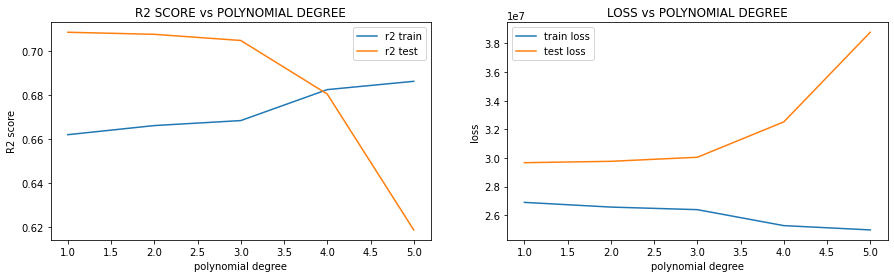

In [149]:
fig, axes = plt.subplots(1 ,2 ,figsize = (15,4))

axes[0].plot(np.arange(1, 6), r2_train_rec[:5], label = 'r2 train')
axes[0].plot(np.arange(1, 6), r2_test_rec[:5], label = 'r2 test')
axes[0].set_title('R2 SCORE vs POLYNOMIAL DEGREE')
axes[0].set_xlabel('polynomial degree')
axes[0].set_ylabel('R2 score')
axes[0].legend()



axes[1].plot(np.arange(1, 6), cost_train_rec[:5], label = 'train loss')
axes[1].plot(np.arange(1, 6), cost_test_rec[:5], label = 'test loss')
axes[1].set_title('LOSS vs POLYNOMIAL DEGREE')
axes[1].set_xlabel('polynomial degree')
axes[1].set_ylabel('loss')
axes[1].legend()

plt.show()

---
## Summary from model evaluation with polynomial degree ranging from 1 to 5
- The degree of one yields the r2 score at ~ 66% and 71% on train at test sets respectively. These values will be used as the baseline
- Increasing polynomial to 2 and 3 degrees, the r2 score of train set slightly increases while that of the test set slightly decreases, at around 1%. In terms of loss function, the train loss slightly decreases in contrast to the nominal increment on test set's loss. On this range, the model seems to just start to overfit as the test loss increases a bit with higher polynomial, but overall still can perform well
- However, from the 4 polynomial degrees, r2 score on test set sharply drop, meaning the poor fitness of predicted value and true value. The observation is further confirmed with huge jump on test loss function. These 2 happenings suggest that the model is already OVERFITTING !
- Considering this dataset, linear regression with only 1 degree is the most computationally effective as it resutls in the highest r2 score, and the lowest loss function in test set